# 5.2 워드클라우드

## 5.2.2 해시태그 데이터 불러오기

In [2]:
# 예제 5-14 크롤링 결과 중 해시태그 데이터 불러오기
import pandas as pd
raw_total = pd.read_excel('./files/1_crawling_raw.xlsx')
raw_total['tags'][:3]

0    ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1    ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2    ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
Name: tags, dtype: object

In [13]:

# 예제 5-15 해시태그 통합 저장하기
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tag in tags_list:
        tags_total.append(tag)

## 5.2.3 해시태그 출현 빈도 집계

In [14]:
# 예제 5-16 빈도수 집계하기(Counter)
from collections import Counter
tag_counts = Counter(tags_total)

In [15]:
# 예제 5-17 가장 많이 사용된 해시태그 살펴보기 
tag_counts.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도', 2096),
 ('#제주', 1567),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#jeju', 776),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#일상', 717),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#반영구', 443),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435)]

In [16]:
# 예제 5-18 데이터 정제하기
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju', '#반영구', '#제주자연눈썹',
'#서귀포눈썹문신', '#제주눈썹문신', '#소통', '#맞팔','']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주', 1567),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주도관광', 471),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#눈썹문신', 443),
 ('#제주속눈썹', 435),
 ('#서귀포남자눈썹문신', 433),
 ('#서귀포자연눈썹', 433),
 ('#제주남자눈썹문신', 433),
 ('#서귀포속눈썹', 433),
 ('#서귀포반영구', 433),
 ('#제주스타그램', 432),
 ('#제주일상', 424),
 ('#애월맛집', 410),
 ('#제주메이크업', 388)]

## 5.2.4 막대차트로 해시태그 살펴보기

In [9]:
# 예제 5-19 시각화 라이브러리 호출 및 환경 설정(한글 폰트)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32","win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font', family=font_name)

In [17]:
# 예제 5-20 데이터 준비하기
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags','counts']

<AxesSubplot:xlabel='counts', ylabel='tags'>

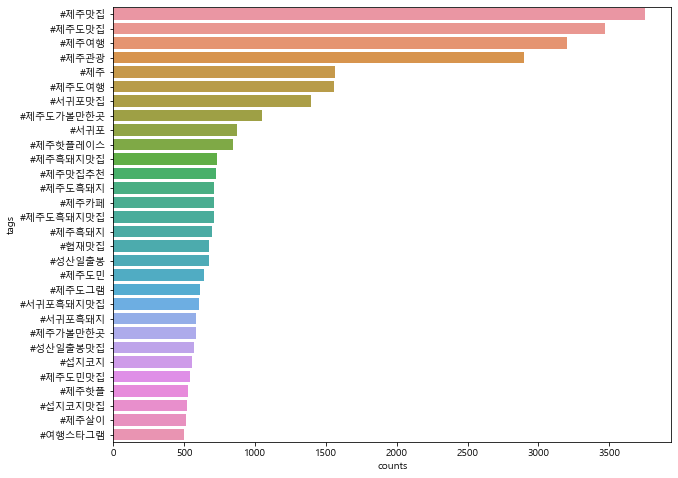

In [18]:
# 예제 5-21 막대 차트 그리기
plt.figure(figsize=(10,8))
sns.barplot(x='counts', y='tags', data = tag_counts_df)

## 5.2.5 워드 클라우드 그리기

In [23]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\hs\anaconda3\python.exe -m pip install --upgrade pip' command.


In [24]:
# 예제ㅔ 5-22 워드클라우드 라이브러리 불러오기
import matplotlib.pyplot as plt
from wordcloud import WordCloud     # 에러시 ! pip install wordcloud 실행
import platform

if platform.system() == 'Windows':  # 윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == 'Darwin': # Mac의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

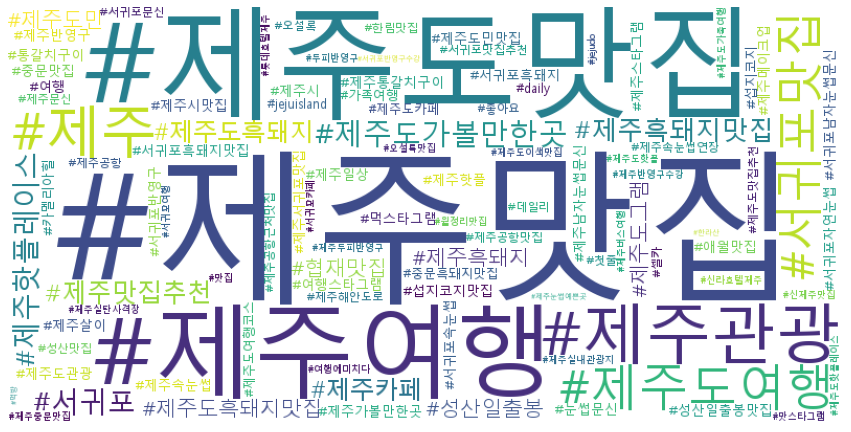

In [26]:
# 예제 5-23 워드클라우드 만들기
wordcloud=WordCloud(font_path= font_path, 
                    background_color="white",
                    max_words=100,
                    relative_scaling= 0.3,
                    width = 800,
                    height = 400
                 ).generate_from_frequencies(tag_counts_selected)  
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./files/2_tag-wordcloud.png')                   